<a href="https://colab.research.google.com/github/Reenook/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


check for total sum of null values in our data setif there are some then it will be any number but zero within our columns  

In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df['Spending Score (1-100)'].value_counts()

,count
Spending Score (1-100),
42,8
55,7
73,6
46,6
48,5
...,...
68,1
85,1
23,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **EDA**

this shows the spending age is peaking at 40

<Axes: xlabel='Age', ylabel='Density'>

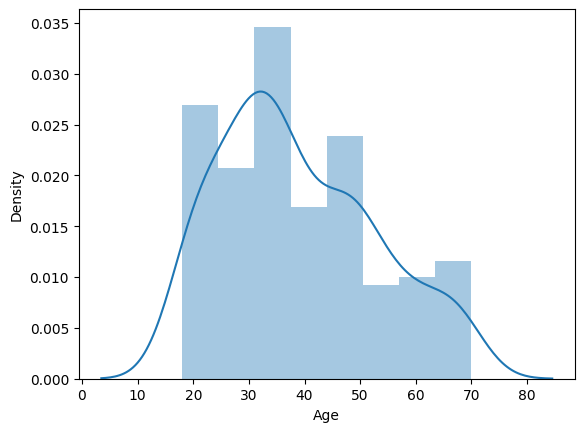

In [9]:
sns.distplot(df['Age'])

this shows that females usually spend more then men according to the data available in our dataset

<Axes: xlabel='count', ylabel='Gender'>

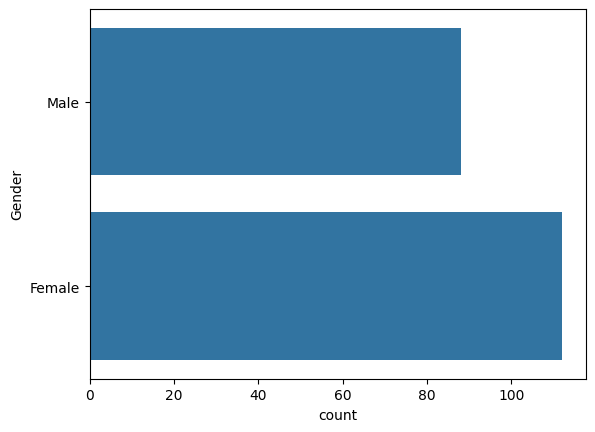

In [8]:
sns.countplot(df['Gender'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

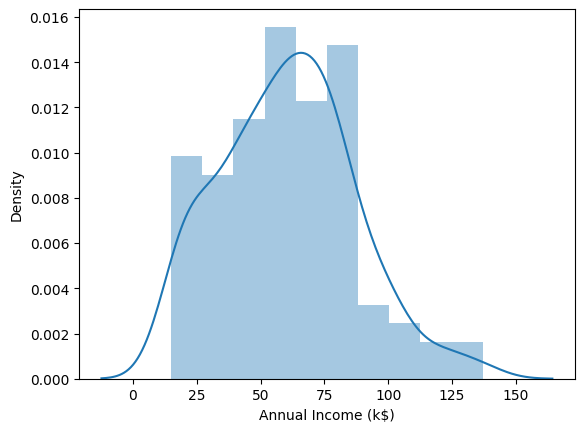

In [11]:
sns.distplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

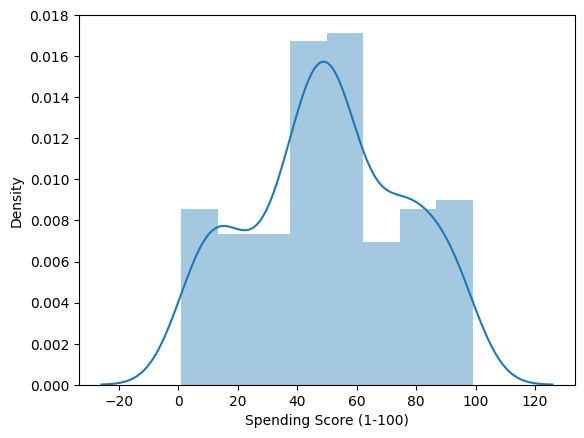

In [12]:
sns.distplot(df['Spending Score (1-100)'])

<Axes: >

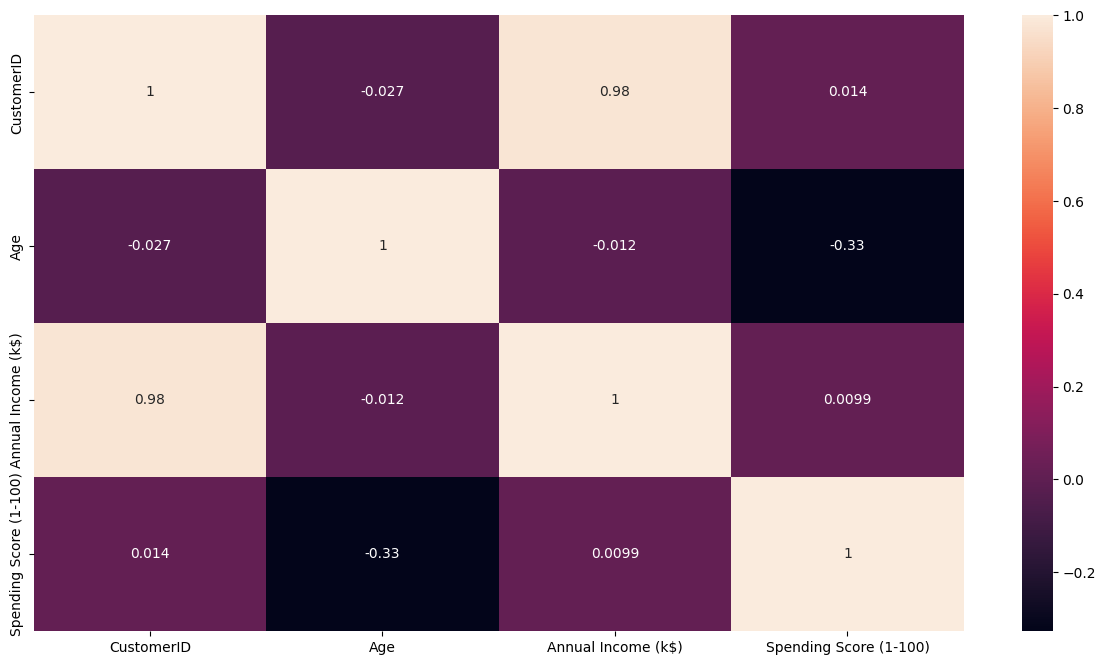

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True),annot=True) #had to specify numeric only because the gender column is categorical

# **Clustering**

So now we have to cluster our dataset , we will use k=2

In [19]:
df1=df[['Annual Income (k$)','Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

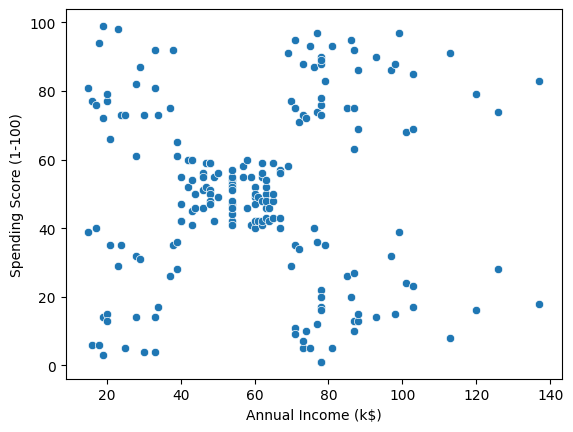

In [20]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df1)

In [29]:
errors=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df1)
  errors.append(kmeans.inertia_)

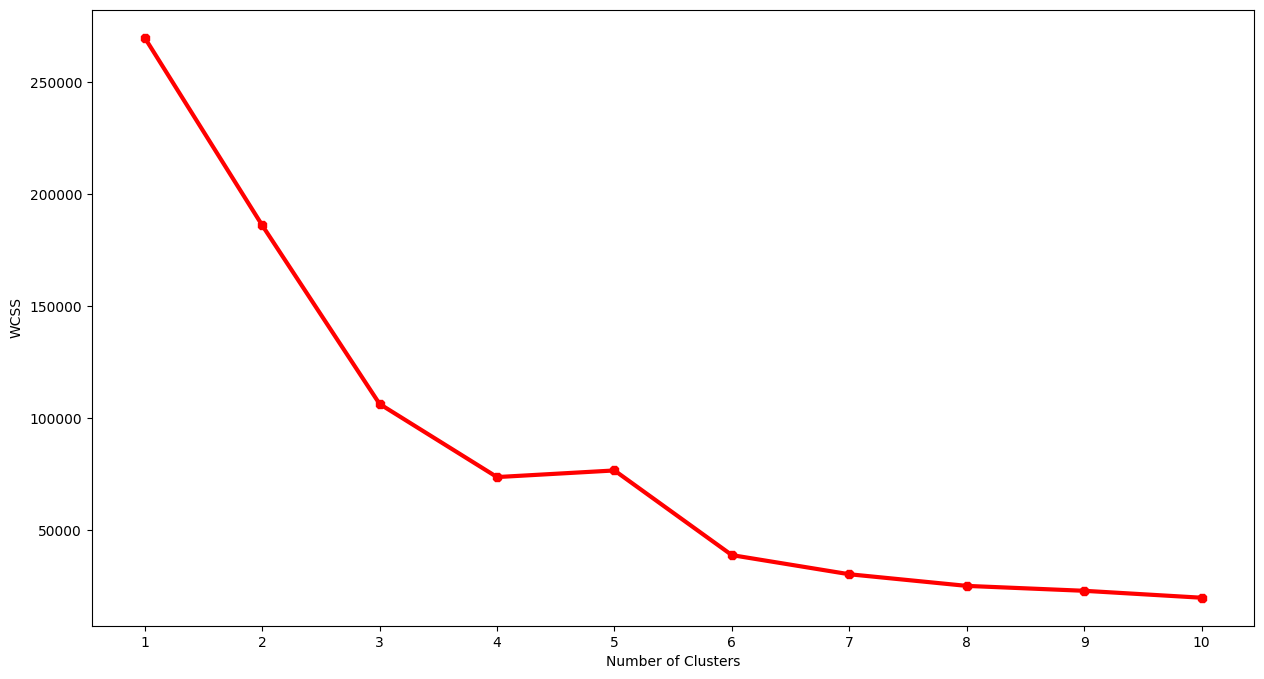

In [22]:
plt.figure(figsize=(15,8))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,marker='8',color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

Assigning labels to a specific cluster

In [23]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(df1)
y=kmeans.predict(df1)
df1['Label']=y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


visual representation of the clusters for the corresponding labels

Based on these cluster representations we can determine what to do with each demographic being represented in each cluster

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

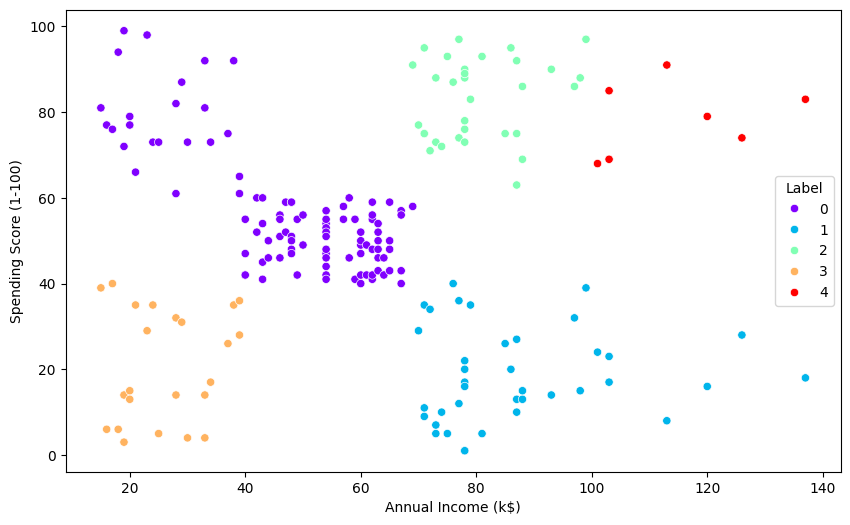

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', palette='rainbow')

**Clustering on three features**

In [33]:
"""
We will repeat the same process here except we will use another feature in this case that
feature will be the age column
"""
df2=df[['Annual Income (k$)','Spending Score (1-100)','Age']]
df2.head()


,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


This time we will plot it on a three dimensional plot

In [34]:
errors=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df2)
  errors.append(kmeans.inertia_)

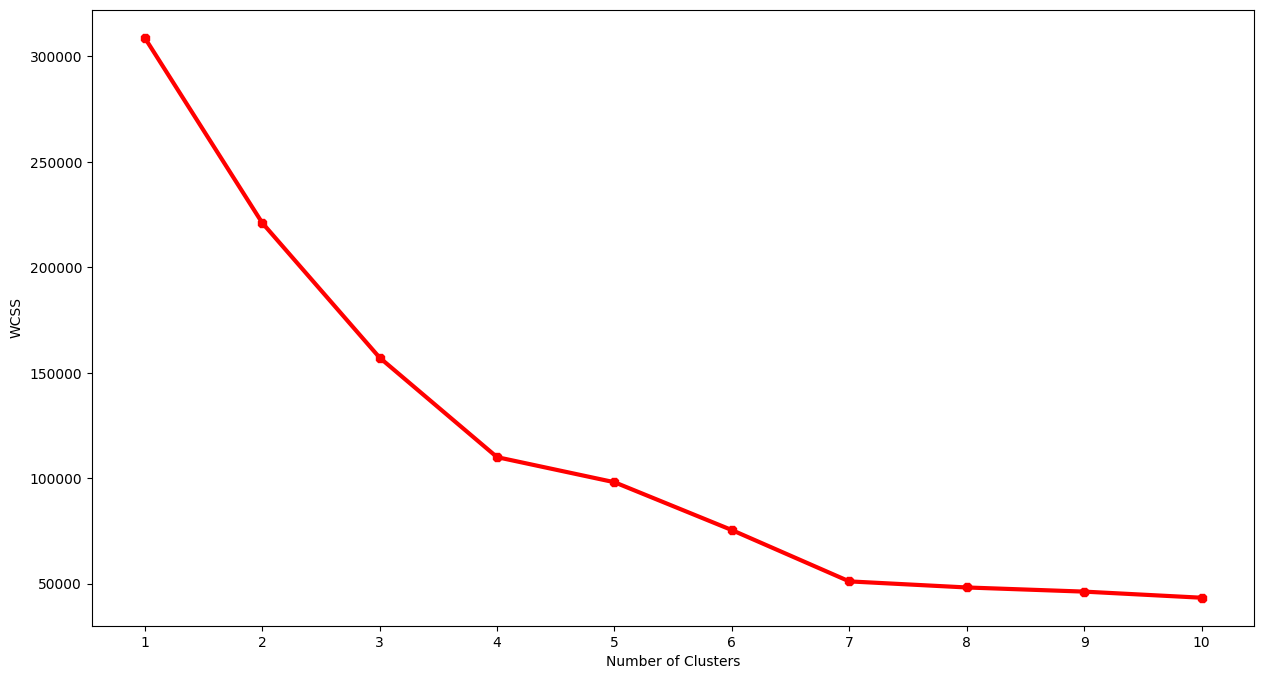

In [35]:
plt.figure(figsize=(15,8))
plt.plot(range(1,11),errors)
plt.plot(range(1,11),errors,linewidth=3,marker='8',color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [37]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(df2)
y=kmeans.predict(df2)
df2['Label']=y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,3
1,15,81,21,4
2,16,6,20,3
3,16,77,23,4
4,17,40,31,3


we use a 3d scatter plot to plot see our clusters

Text(0.5, 0, 'Age')

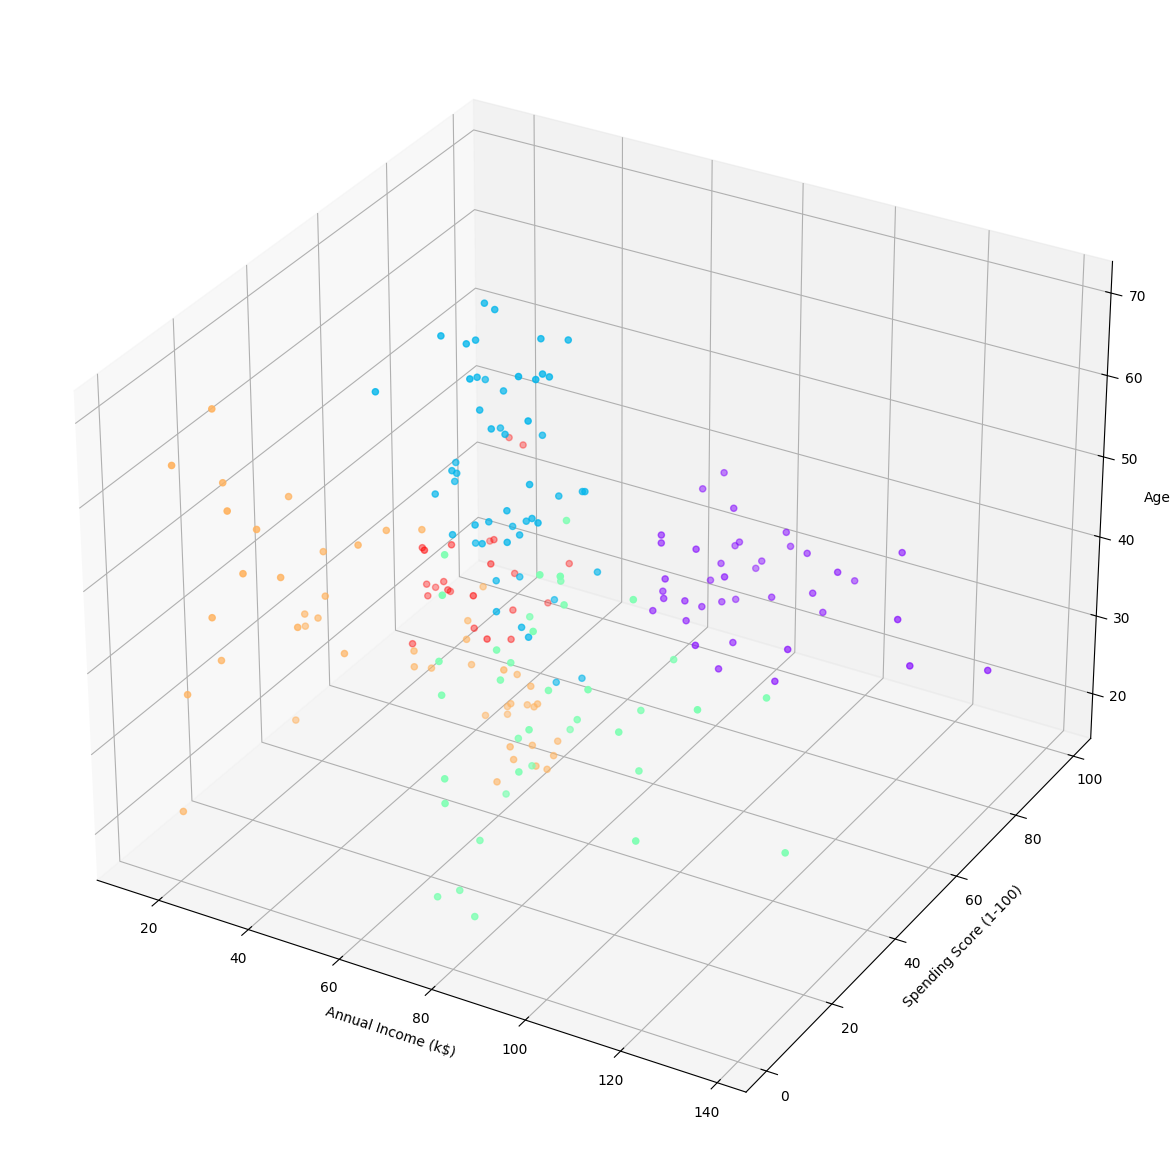

In [43]:
fig=plt.figure(figsize=(20,15))
axis=fig.add_subplot(111,projection='3d')
axis.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],df2['Age'],c=df2['Label'],cmap='rainbow')
axis.set_xlabel('Annual Income (k$)')
axis.set_ylabel('Spending Score (1-100)')
axis.set_zlabel('Age')